import libraries

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv("Data_Xeek_train_subset_clean.csv")

In [4]:
df.head(5)

,WELL,DEPTH_MD,GROUP,FORMATION,CALI,RDEP,RHOB,GR,NPHI,PEF,DTC,LITH
0,15/9-13,494.528,NORDLAND GP.,NaN,19.480835,1.798681,1.884186,80.200851,NaN,20.915468,161.131180,Shale
1,15/9-13,494.680,NORDLAND GP.,NaN,19.468800,1.795641,1.889794,79.262886,NaN,19.383013,160.603470,Shale
2,15/9-13,494.832,NORDLAND GP.,NaN,19.468800,1.800733,1.896523,74.821999,NaN,22.591518,160.173615,Shale
3,15/9-13,494.984,NORDLAND GP.,NaN,19.459282,1.801517,1.891913,72.878922,NaN,32.191910,160.149429,Shale
4,15/9-13,495.136,NORDLAND GP.,NaN,19.453100,1.795299,1.880034,71.729141,NaN,38.495632,160.128342,Shale


In [5]:
df.describe()

,DEPTH_MD,CALI,RDEP,RHOB,GR,NPHI,PEF,DTC
count,133198.000000,133006.000000,125805.000000,108053.000000,133198.000000,91725.000000,100840.000000,132635.000000
mean,1792.944663,13.199399,1.743774,2.199556,69.553872,0.355602,4.511845,122.700286
std,739.441515,3.561386,13.233330,0.236902,39.328728,0.143857,5.092807,34.234879
min,415.261599,5.946157,0.123068,1.366913,0.109284,-0.023143,1.010027,7.415132
25%,1182.822400,11.381848,0.777323,2.029237,43.244637,0.234927,2.857540,87.899776
50%,1747.524495,12.698571,1.130621,2.162121,66.266132,0.382014,3.780121,135.968094
75%,2413.874901,14.944049,1.644573,2.404375,93.808681,0.480985,5.098502,147.388626
max,3272.024000,25.717396,1856.935059,3.115611,804.298950,0.817310,365.575592,230.432953


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133198 entries, 0 to 133197
Data columns (total 12 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   WELL       133198 non-null  object 
 1   DEPTH_MD   133198 non-null  float64
 2   GROUP      133198 non-null  object 
 3   FORMATION  111632 non-null  object 
 4   CALI       133006 non-null  float64
 5   RDEP       125805 non-null  float64
 6   RHOB       108053 non-null  float64
 7   GR         133198 non-null  float64
 8   NPHI       91725 non-null   float64
 9   PEF        100840 non-null  float64
 10  DTC        132635 non-null  float64
 11  LITH       133198 non-null  object 
dtypes: float64(8), object(4)
memory usage: 12.2+ MB


In [7]:
df.dropna(inplace=True)

In [8]:
df.describe()

,DEPTH_MD,CALI,RDEP,RHOB,GR,NPHI,PEF,DTC
count,81586.000000,81586.000000,81586.000000,81586.000000,81586.000000,81586.000000,81586.000000,81586.000000
mean,2043.137258,11.852378,1.957727,2.217618,67.051531,0.363290,4.603237,115.838336
std,608.908959,2.930998,16.409763,0.226734,36.319849,0.140331,3.774044,30.772143
min,797.043199,5.946157,0.123068,1.412190,5.782680,-0.005300,1.126667,7.415132
25%,1534.512000,8.872679,0.734227,2.033753,43.952875,0.241585,3.129977,86.175848
50%,2024.834999,12.388681,1.085861,2.180840,64.133839,0.400063,4.009643,124.449657
75%,2577.673500,13.238356,1.789819,2.424240,86.371059,0.484759,5.260145,143.908131
max,3198.760000,25.717396,1856.935059,3.005321,804.298950,0.800262,288.103638,230.432953


In [9]:
df['LITH'].unique()

array(['Sandstone', 'Shale', 'Sandstone/Shale', 'Limestone', 'Tuff',
       'Marl', 'Chalk', 'Dolomite', 'Coal', 'Halite', 'Anhydrite'],
      dtype=object)

Data splitting

In [11]:
X =df[['RDEP', 'RHOB', 'GR', 'NPHI', 'PEF', 'DTC']]
y =df['LITH']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

Creating Random Forest Model

In [13]:
RFMC = RandomForestClassifier()
RFMC

RandomForestClassifier()

In [14]:
RFMC.fit(X_train, y_train)

RandomForestClassifier()

In [15]:
y_pred = RFMC.predict(X_test)

In [16]:
y_pred[0:10]

array(['Limestone', 'Shale', 'Shale', 'Shale', 'Chalk', 'Sandstone/Shale',
       'Limestone', 'Shale', 'Limestone', 'Sandstone'], dtype=object)

In [17]:
y_test[0:10]

90204           Limestone
74651               Shale
25664               Shale
94064               Shale
90781               Chalk
75499     Sandstone/Shale
32192           Limestone
56679               Shale
119268          Limestone
114973          Sandstone
Name: LITH, dtype: object

In [ ]:
Evaluating Model

In [18]:
RFMC.score(X_train, y_train)

1.0

In [19]:
RFMC.score(X_test, y_test)

0.9109331590129106

In [20]:
accuracy_score(y_test, y_pred)

0.9109331590129106

In [22]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

      Anhydrite       0.96      1.00      0.98        24
          Chalk       0.85      0.74      0.79       656
           Coal       1.00      0.53      0.69        19
       Dolomite       0.85      0.55      0.67        31
         Halite       0.80      1.00      0.89         4
      Limestone       0.88      0.87      0.87      3255
           Marl       0.87      0.75      0.81      1131
      Sandstone       0.89      0.88      0.89      2973
Sandstone/Shale       0.76      0.63      0.69      1359
          Shale       0.94      0.98      0.96     14700
           Tuff       0.78      0.56      0.65       324

       accuracy                           0.91     24476
      macro avg       0.87      0.77      0.81     24476
   weighted avg       0.91      0.91      0.91     24476



In [23]:
cm_matrix = confusion_matrix(y_test, y_pred)

In [24]:
labels = ['Limestone', 'Shale', 'Shale', 'Shale', 'Chalk', 'Sandstone/Shale','Limestone', 'Shale', 'Limestone', 'Sandstone']
labels.sort()

Text(0.5, 1.0, 'Confusion Matrix with Labels')

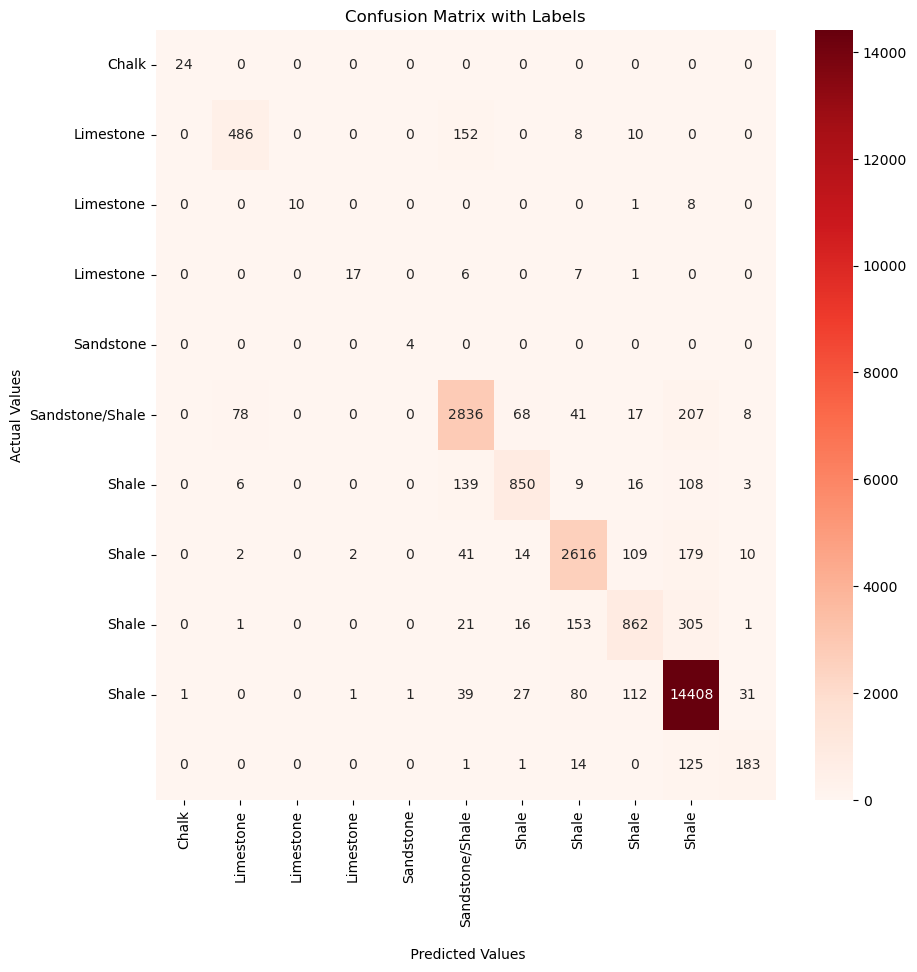

In [27]:
fig = plt.figure(figsize=(10,10))
ax = sns.heatmap(cm_matrix, annot=True,cmap ='Reds',fmt='.0f'
                 ,xticklabels = labels,
                 yticklabels = labels)
ax.set_xlabel('\n Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix with Labels')